In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['Price'] = boston.target

y = bos['Price']
X = bos.drop('Price', axis=1)

In [ ]:
cat_cols = list(df.select_dtypes(include=['object']).columns)

#### Lasso Regression

In [13]:
lasso = Lasso(alpha=1)
lasso.fit(X, y)
lasso.coef_
pd.DataFrame(lasso.coef_, X.columns, columns=['coefs'])

,coefs
CRIM,-0.063423
ZN,0.049169
INDUS,-0.000000
CHAS,0.000000
NOX,-0.000000
RM,0.946786
AGE,0.020927
DIS,-0.669009
RAD,0.264175
TAX,-0.015209


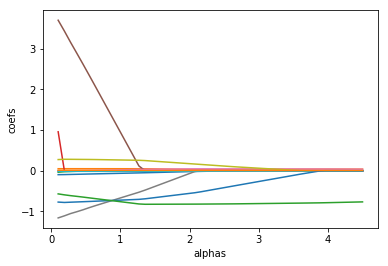

In [16]:
n_alphas = 50
alphas = np.linspace(0.1,4.5, n_alphas)
coefs=[]
model = Lasso()
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

The chart shows that as alpha increases it is setting many coefficients to zero. However, we dont know the optimal alpha.

##### Let's tune the Lasso regression and find out the optimal alpha.

In [19]:
n_alphas=50
alphas=np.linspace(0.1,1, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=22)
lasso_cv.fit(X,y)

LassoCV(alphas=array([0.1    , 0.11837, 0.13673, 0.1551 , 0.17347, 0.19184, 0.2102 ,
       0.22857, 0.24694, 0.26531, 0.28367, 0.30204, 0.32041, 0.33878,
       0.35714, 0.37551, 0.39388, 0.41224, 0.43061, 0.44898, 0.46735,
       0.48571, 0.50408, 0.52245, 0.54082, 0.55918, 0.57755, 0.59592,
       0.6142...469, 0.85306,
       0.87143, 0.8898 , 0.90816, 0.92653, 0.9449 , 0.96327, 0.98163,
       1.     ]),
    copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
    verbose=False)

In [20]:
lasso_cv.alpha_

0.15510204081632656

In [21]:
lasso = Lasso(alpha=0.15510204081632656)
lasso.fit(X, y)
lasso.coef_
pd.DataFrame(lasso.coef_, X.columns, columns=['coefs'])

,coefs
CRIM,-0.096288
ZN,0.049461
INDUS,-0.026324
CHAS,0.076938
NOX,-0.000000
RM,3.540024
AGE,-0.006942
DIS,-1.130679
RAD,0.281073
TAX,-0.015081


### Ridge Regression

In [25]:
ridge = Ridge(alpha=0.5)
ridge.fit(X, y)
ridge.coef_
pd.DataFrame(ridge.coef_, X.columns, columns=['coefs'])

,coefs
CRIM,-0.104941
ZN,0.047014
INDUS,0.002525
CHAS,2.613951
NOX,-13.437290
RM,3.835873
AGE,-0.003093
DIS,-1.411508
RAD,0.295534
TAX,-0.012682


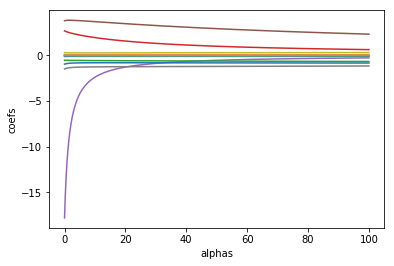

In [31]:
n_alphas = 200
alphas = np.logspace(-3, 2, n_alphas)
coefs=[]
model = Ridge()
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [36]:
n_alphas = 1000
alphas = np.logspace(-2, 0)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X, y)

ridge_cv.alpha_

0.0372759372031494

In [37]:
ridge = Ridge(alpha=0.0372759372031494)
ridge.fit(X, y)
ridge.coef_
pd.DataFrame(ridge.coef_, X.columns, columns=['coefs'])

,coefs
CRIM,-0.106954
ZN,0.046453
INDUS,0.019090
CHAS,2.682198
NOX,-17.375621
RM,3.808059
AGE,0.000377
DIS,-1.469563
RAD,0.304665
TAX,-0.012363


### Elastic Net

In [38]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

enet = ElasticNet(alpha=0.1)
enet.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
pd.DataFrame(enet.coef_, X.columns, columns=['coefs'])

,coefs
CRIM,-0.099086
ZN,0.051346
INDUS,-0.045693
CHAS,0.988918
NOX,-0.060960
RM,3.248982
AGE,-0.007191
DIS,-1.181064
RAD,0.288183
TAX,-0.014949


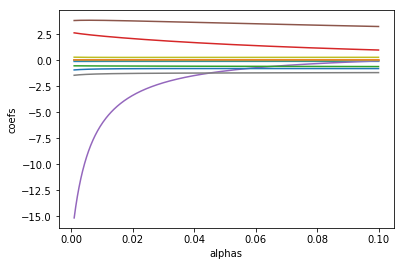

In [44]:
n_alphas = 200
alphas = np.logspace(-3, -1, n_alphas)
coefs=[]
model = ElasticNet()
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [47]:
n_alphas = 2000
alphas = np.logspace(-3, 1, n_alphas)

en_cv = ElasticNetCV(alphas=alphas, cv=3)
en_cv.fit(X, y)
en_cv.alpha_

0.32602929758609733

In [48]:
enet = ElasticNet(alpha=0.32602929758609733)
enet.fit(X, y)
pd.DataFrame(enet.coef_, X.columns, columns=['coefs'])

,coefs
CRIM,-0.096057
ZN,0.053660
INDUS,-0.036746
CHAS,0.027545
NOX,-0.000000
RM,2.212247
AGE,0.003726
DIS,-1.077044
RAD,0.309080
TAX,-0.016061
